## Installing and importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## Importing the reviews

In [ ]:
primevideo = pd.read_csv('PrimeVideo_Google_Play.csv')

In [ ]:
primevideo

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,6656a790-b472-4928-b0f1-47e8ba0b81a4,Ashlee L,https://play-lh.googleusercontent.com/a-/ACB-R...,Love the app,5,0,3.0.342.12047,2023-04-05 10:49:46,NaN,NaN
1,1,c4fcc410-e5eb-42ba-9c41-557846039051,Anna Bowers,https://play-lh.googleusercontent.com/a-/ACB-R...,Love it,5,0,3.0.343.77747,2023-04-05 10:40:03,NaN,NaN
2,2,00a11da8-1490-4062-8217-769d8ed97933,Payal Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Its very nice app we can watch 1000000000000 m...,5,0,NaN,2023-04-05 10:30:41,NaN,NaN
3,3,66138b1e-3ec8-4d2f-8a2a-aaf62ecf6354,Kathyrodney,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,3.0.343.77747,2023-04-05 10:30:06,NaN,NaN
4,4,d3245f4b-7e07-411b-bf10-8b58be337849,Ray Rudd,https://play-lh.googleusercontent.com/a-/ACB-R...,I have found lots of free older series to watc...,4,0,3.0.343.77747,2023-04-05 10:26:51,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
162777,162777,06a2e1d7-d186-404a-a946-a8292a3ddc37,Neerak Kumar,https://play-lh.googleusercontent.com/a/AGNmyx...,Excellent streaming quality no disturbance min...,5,0,3.0.299.3045,2021-07-07 06:48:32,NaN,NaN
162778,162778,f0fd48f5-122c-483d-8212-4879c1aeba49,Vivek Sharma,https://play-lh.googleusercontent.com/a-/ACB-R...,It is awesome,4,0,3.0.299.3047,2021-07-07 06:45:03,NaN,NaN
162779,162779,cd5c8ac9-f58c-40cc-8580-6371d5914294,M Webb,https://play-lh.googleusercontent.com/a-/ACB-R...,App is unstable and is wrought with errors.,1,0,NaN,2021-07-07 06:44:40,NaN,NaN
162780,162780,aab6d694-4f1a-46e8-8baa-4c9562eb9c11,jay,https://play-lh.googleusercontent.com/a/AGNmyx...,"Great app, many shows, hope there's more Ameri...",4,7,3.0.299.3047,2021-07-07 06:43:47,NaN,NaN


In [ ]:
primevideo.dtypes

Unnamed: 0                int64
reviewId                 object
userName                 object
userImage                object
content                  object
score                     int64
thumbsUpCount             int64
reviewCreatedVersion     object
at                       object
replyContent            float64
repliedAt               float64
dtype: object

## Labeling reviews basing on the score

In [ ]:
primevideo['label'] = 'neutral'

high_mask = primevideo['score'] >= 4
primevideo['label'].loc[high_mask] = 'positive'

low_mask = primevideo['score'] <= 2
primevideo['label'].loc[low_mask] = 'negative'

<ipython-input-5-9caa568d6b97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primevideo['label'].loc[high_mask] = 'positive'
<ipython-input-5-9caa568d6b97>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primevideo['label'].loc[low_mask] = 'negative'


In [ ]:
primevideo

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,label
0,0,6656a790-b472-4928-b0f1-47e8ba0b81a4,Ashlee L,https://play-lh.googleusercontent.com/a-/ACB-R...,Love the app,5,0,3.0.342.12047,2023-04-05 10:49:46,NaN,NaN,positive
1,1,c4fcc410-e5eb-42ba-9c41-557846039051,Anna Bowers,https://play-lh.googleusercontent.com/a-/ACB-R...,Love it,5,0,3.0.343.77747,2023-04-05 10:40:03,NaN,NaN,positive
2,2,00a11da8-1490-4062-8217-769d8ed97933,Payal Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Its very nice app we can watch 1000000000000 m...,5,0,NaN,2023-04-05 10:30:41,NaN,NaN,positive
3,3,66138b1e-3ec8-4d2f-8a2a-aaf62ecf6354,Kathyrodney,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,3.0.343.77747,2023-04-05 10:30:06,NaN,NaN,positive
4,4,d3245f4b-7e07-411b-bf10-8b58be337849,Ray Rudd,https://play-lh.googleusercontent.com/a-/ACB-R...,I have found lots of free older series to watc...,4,0,3.0.343.77747,2023-04-05 10:26:51,NaN,NaN,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
162777,162777,06a2e1d7-d186-404a-a946-a8292a3ddc37,Neerak Kumar,https://play-lh.googleusercontent.com/a/AGNmyx...,Excellent streaming quality no disturbance min...,5,0,3.0.299.3045,2021-07-07 06:48:32,NaN,NaN,positive
162778,162778,f0fd48f5-122c-483d-8212-4879c1aeba49,Vivek Sharma,https://play-lh.googleusercontent.com/a-/ACB-R...,It is awesome,4,0,3.0.299.3047,2021-07-07 06:45:03,NaN,NaN,positive
162779,162779,cd5c8ac9-f58c-40cc-8580-6371d5914294,M Webb,https://play-lh.googleusercontent.com/a-/ACB-R...,App is unstable and is wrought with errors.,1,0,NaN,2021-07-07 06:44:40,NaN,NaN,negative
162780,162780,aab6d694-4f1a-46e8-8baa-4c9562eb9c11,jay,https://play-lh.googleusercontent.com/a/AGNmyx...,"Great app, many shows, hope there's more Ameri...",4,7,3.0.299.3047,2021-07-07 06:43:47,NaN,NaN,positive


## Adding a column with the trimester of publication

In [ ]:
primevideo['at'] = pd.to_datetime(primevideo['at'], format="%Y-%m-%d %H:%M:%S")

In [ ]:
primevideo.dtypes

Unnamed: 0                       int64
reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                   float64
repliedAt                      float64
label                           object
dtype: object

In [ ]:
primevideo['year'] =  primevideo['at'].apply(lambda x: x.year)
primevideo['month'] =  primevideo['at'].apply(lambda x: x.month)

In [ ]:
primevideo['quarter'] = (primevideo['month'] / 3).apply(math.ceil)

In [ ]:
primevideo['year'] = primevideo['year'].astype(str)
primevideo['month'] = primevideo['month'].astype(str)
primevideo['quarter'] = primevideo['quarter'].astype(str)
primevideo['quarter'] = primevideo['year'].apply(lambda x: x[-2:]) + ' ' + primevideo['quarter'] + 'Q'

In [ ]:
primevideo

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,label,year,month,quarter
0,0,6656a790-b472-4928-b0f1-47e8ba0b81a4,Ashlee L,https://play-lh.googleusercontent.com/a-/ACB-R...,Love the app,5,0,3.0.342.12047,2023-04-05 10:49:46,NaN,NaN,positive,2023,4,23 2Q
1,1,c4fcc410-e5eb-42ba-9c41-557846039051,Anna Bowers,https://play-lh.googleusercontent.com/a-/ACB-R...,Love it,5,0,3.0.343.77747,2023-04-05 10:40:03,NaN,NaN,positive,2023,4,23 2Q
2,2,00a11da8-1490-4062-8217-769d8ed97933,Payal Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Its very nice app we can watch 1000000000000 m...,5,0,NaN,2023-04-05 10:30:41,NaN,NaN,positive,2023,4,23 2Q
3,3,66138b1e-3ec8-4d2f-8a2a-aaf62ecf6354,Kathyrodney,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,3.0.343.77747,2023-04-05 10:30:06,NaN,NaN,positive,2023,4,23 2Q
4,4,d3245f4b-7e07-411b-bf10-8b58be337849,Ray Rudd,https://play-lh.googleusercontent.com/a-/ACB-R...,I have found lots of free older series to watc...,4,0,3.0.343.77747,2023-04-05 10:26:51,NaN,NaN,positive,2023,4,23 2Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162777,162777,06a2e1d7-d186-404a-a946-a8292a3ddc37,Neerak Kumar,https://play-lh.googleusercontent.com/a/AGNmyx...,Excellent streaming quality no disturbance min...,5,0,3.0.299.3045,2021-07-07 06:48:32,NaN,NaN,positive,2021,7,21 3Q
162778,162778,f0fd48f5-122c-483d-8212-4879c1aeba49,Vivek Sharma,https://play-lh.googleusercontent.com/a-/ACB-R...,It is awesome,4,0,3.0.299.3047,2021-07-07 06:45:03,NaN,NaN,positive,2021,7,21 3Q
162779,162779,cd5c8ac9-f58c-40cc-8580-6371d5914294,M Webb,https://play-lh.googleusercontent.com/a-/ACB-R...,App is unstable and is wrought with errors.,1,0,NaN,2021-07-07 06:44:40,NaN,NaN,negative,2021,7,21 3Q
162780,162780,aab6d694-4f1a-46e8-8baa-4c9562eb9c11,jay,https://play-lh.googleusercontent.com/a/AGNmyx...,"Great app, many shows, hope there's more Ameri...",4,7,3.0.299.3047,2021-07-07 06:43:47,NaN,NaN,positive,2021,7,21 3Q


## Plotting the counter of positive/neutral/negative comments over time

In [ ]:
aggregated_reviews = primevideo.groupby(['label', 'quarter']).count()

In [ ]:
aggregated_reviews

Unnamed: 0  reviewId  userName  userImage  content  score  \
label    quarter                                                              
negative 21 3Q          6776      6776      6776       6776     6776   6776   
         21 4Q          5786      5786      5786       5786     5786   5786   
         22 1Q          6286      6286      6286       6286     6286   6286   
         22 2Q          6777      6777      6777       6777     6776   6777   
         22 3Q          7344      7344      7344       7344     7344   7344   
         22 4Q         10028     10028     10028      10028    10028  10028   
         23 1Q          6995      6995      6995       6995     6995   6995   
         23 2Q           316       316       316        316      316    316   
neutral  21 3Q          1991      1991      1991       1991     1991   1991   
         21 4Q          1547      1547      1547       1547     1547   1547   
         22 1Q          1629      1629      1629       1629     1629   1629   
         22 2Q          1449      1449      1449       1449     1449   1449   
         22 3Q          1180      1180      1180       1180     1180   1180   
         22 4Q          1746      1746      1746       1746     1746   1746   
         23 1Q          1610      1610      1609       1610     1610   1610   
         23 2Q            67        67        67         67       67     67   
positive 21 3Q         20831     20831     20831      20831    20830  20831   
         21 4Q         17585     17585     17585      17585    17583  17585   
         22 1Q         17905     17905     17905      17905    17904  17905   
         22 2Q         14021     14021     14021      14021    14019  14021   
         22 3Q          8220      8220      8220       8220     8220   8220   
         22 4Q         11179     11179     11179      11179    11179  11179   
         23 1Q         10994     10994     10994      10994    10992  10994   
         23 2Q           520       520       520        520      520    520   

                  thumbsUpCount  reviewCreatedVersion     at  replyContent  \
label    quarter                                                             
negative 21 3Q             6776                  5170   6776             0   
         21 4Q             5786                  4466   5786             0   
         22 1Q             6286                  4827   6286             0   
         22 2Q             6777                  5448   6777             0   
         22 3Q             7344                  6116   7344             0   
         22 4Q            10028                  8274  10028             0   
         23 1Q             6995                  5715   6995             0   
         23 2Q              316                   274    316             0   
neutral  21 3Q             1991                  1666   1991             0   
         21 4Q             1547                  1308   1547             0   
         22 1Q             1629                  1384   1629             0   
         22 2Q             1449                  1229   1449             0   
         22 3Q             1180                  1003   1180             0   
         22 4Q             1746                  1541   1746             0   
         23 1Q             1610                  1428   1610             0   
         23 2Q               67                    60     67             0   
positive 21 3Q            20831                 16587  20831             0   
         21 4Q            17585                 14463  17585             0   
         22 1Q            17905                 14586  17905             0   
         22 2Q            14021                 11510  14021             0   
         22 3Q             8220                  6647   8220             0   
         22 4Q            11179                  9581  11179             0   
         23 1Q            10994                  9338  10994             0   
         23 2

In [ ]:
positive = aggregated_reviews.loc['positive'].reset_index()

In [ ]:
neutral = aggregated_reviews.loc['neutral'].reset_index()

In [ ]:
negative = aggregated_reviews.loc['negative'].reset_index()

In [ ]:
negative

,quarter,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month
0,21 3Q,6776,6776,6776,6776,6776,6776,6776,5170,6776,0,0,6776,6776
1,21 4Q,5786,5786,5786,5786,5786,5786,5786,4466,5786,0,0,5786,5786
2,22 1Q,6286,6286,6286,6286,6286,6286,6286,4827,6286,0,0,6286,6286
3,22 2Q,6777,6777,6777,6777,6776,6777,6777,5448,6777,0,0,6777,6777
4,22 3Q,7344,7344,7344,7344,7344,7344,7344,6116,7344,0,0,7344,7344
5,22 4Q,10028,10028,10028,10028,10028,10028,10028,8274,10028,0,0,10028,10028
6,23 1Q,6995,6995,6995,6995,6995,6995,6995,5715,6995,0,0,6995,6995
7,23 2Q,316,316,316,316,316,316,316,274,316,0,0,316,316


In [ ]:
positive = positive[positive.quarter != '23 2Q']

In [ ]:
neutral = neutral[neutral.quarter != '23 2Q']

In [ ]:
negative = negative[negative.quarter != '23 2Q']

In [ ]:
negative

,quarter,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month
0,21 3Q,6776,6776,6776,6776,6776,6776,6776,5170,6776,0,0,6776,6776
1,21 4Q,5786,5786,5786,5786,5786,5786,5786,4466,5786,0,0,5786,5786
2,22 1Q,6286,6286,6286,6286,6286,6286,6286,4827,6286,0,0,6286,6286
3,22 2Q,6777,6777,6777,6777,6776,6777,6777,5448,6777,0,0,6777,6777
4,22 3Q,7344,7344,7344,7344,7344,7344,7344,6116,7344,0,0,7344,7344
5,22 4Q,10028,10028,10028,10028,10028,10028,10028,8274,10028,0,0,10028,10028
6,23 1Q,6995,6995,6995,6995,6995,6995,6995,5715,6995,0,0,6995,6995


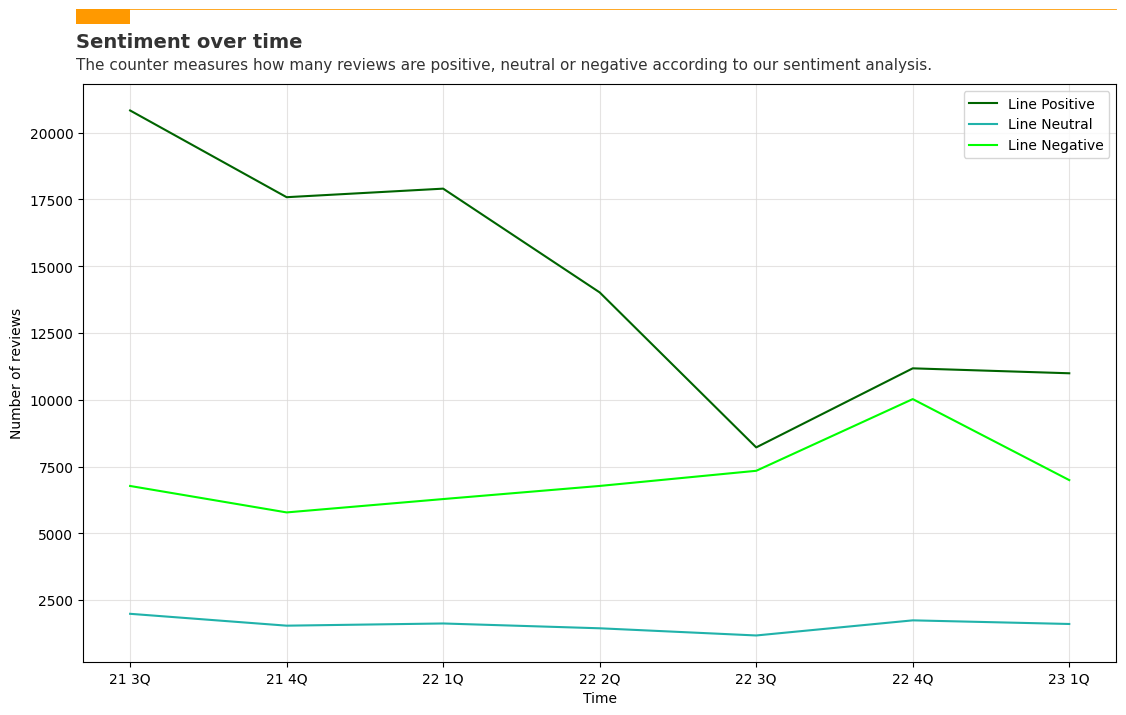

In [ ]:
# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=100)

# create the line graph
plt.plot(positive.quarter, positive.reviewId, label='Line Positive', color='darkgreen')
plt.plot(positive.quarter, neutral.reviewId, label='Line Neutral', color='lightseagreen')
plt.plot(positive.quarter, negative.reviewId, label='Line Negative', color='lime')
# Create the grid 
ax.grid(which='major', axis='x', color='#DAD8D7', alpha=0.7, zorder=1)
ax.grid(which='major', axis='y', color='#DAD8D7', alpha=0.7, zorder=1)
# set the title, legend, and axis labels
plt.xlabel('Time')
plt.ylabel('Number of reviews')
plt.legend()
ax.text(x=0.12, y=0.93, s='Sentiment over time', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=0.90, s='The counter measures how many reviews are positive, neutral or negative according to our sentiment analysis.', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#FF9900', transform=fig.transFigure, clip_on=False, linewidth = 0))
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#FF9900', linewidth=.6)

# display the graph
plt.show()

## Plotting the average score over time


In [ ]:
aggregated_reviews2 = primevideo.groupby(['quarter']).score.mean()

In [ ]:
aggregated_reviews2 = aggregated_reviews2[aggregated_reviews2.index != '23 2Q']

In [ ]:
aggregated_reviews2

quarter
21 3Q    3.872289
21 4Q    3.874227
22 1Q    3.828195
22 2Q    3.599586
22 3Q    3.090182
22 4Q    3.086176
23 1Q    3.376856
Name: score, dtype: float64

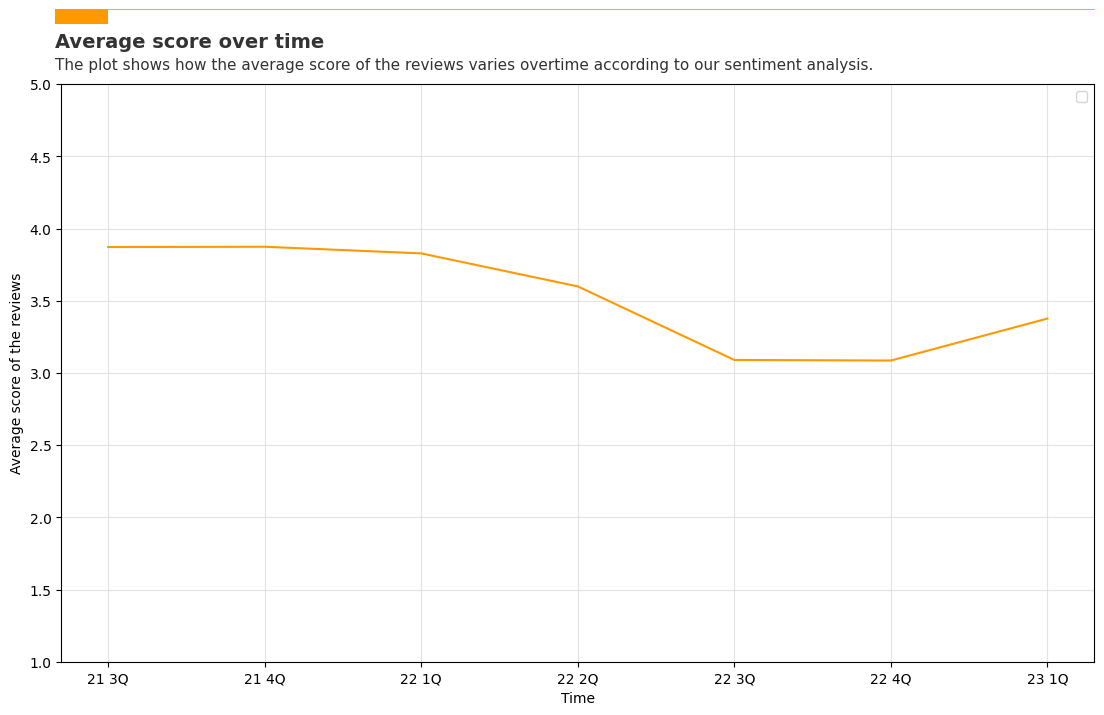

In [ ]:
# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=100)

# create the line graph
plt.plot(aggregated_reviews2.index, aggregated_reviews2.values, color='#FF9900')
# Create the grid 
ax.grid(which='major', axis='x', color='#DAD8D7', alpha=0.7, zorder=1)
ax.grid(which='major', axis='y', color='#DAD8D7', alpha=0.7, zorder=1)
ax.set_ylim(1, 5)
# set the title, legend, and axis labels
plt.xlabel('Time')
plt.ylabel('Average score of the reviews')
plt.legend()
ax.text(x=0.12, y=0.93, s='Average score over time', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=0.90, s='The plot shows how the average score of the reviews varies overtime according to our sentiment analysis.', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#FF9900', transform=fig.transFigure, clip_on=False, linewidth = 0))
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#FF9900', linewidth=.6)

# display the graph
plt.show()